## Importing Dependencies

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier

## Loading Data

In [43]:
df = pd.read_csv("Titanic-Dataset.csv")

## Exploring Data

In [44]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [45]:
df.duplicated().sum()

0

## Data transformation and cleansing 

In [46]:
df['Sex'].replace({'male':1, 'female':0}, inplace=True)
df.drop(['Cabin'], axis=1, inplace=True)
df.drop(['Embarked'], axis=1, inplace=True)
average_age = df['Age'].mean()
df['Age'].fillna(average_age, inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500


In [47]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
dtype: int64

## Data Visualization

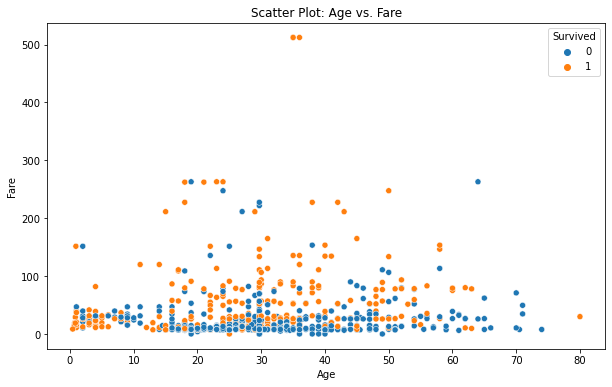

In [48]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df)
plt.title('Scatter Plot: Age vs. Fare')
plt.show()


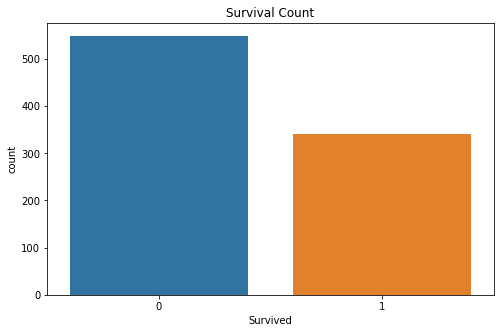

In [49]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Survived', data=df)
plt.title('Survival Count')
plt.show()

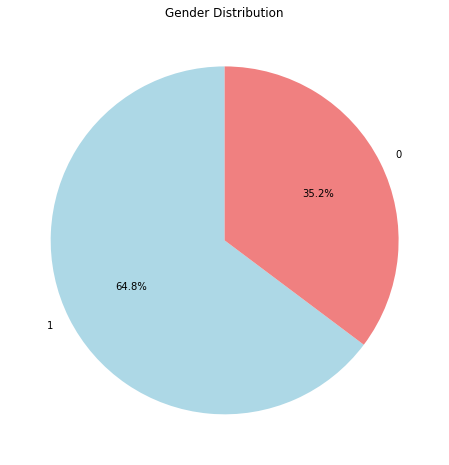

In [50]:
plt.figure(figsize=(8, 8))
gender_distribution = df['Sex'].value_counts()
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
plt.title('Gender Distribution')
plt.show()

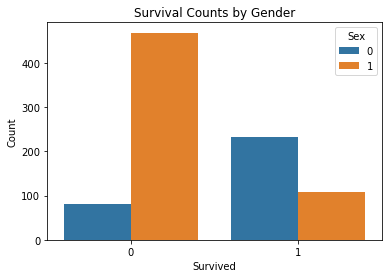

In [51]:
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title('Survival Counts by Gender')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

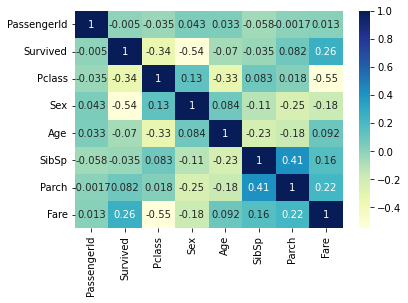

In [54]:
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True) 
plt.show()

## Train Test Split

The reason for using these features that they have the highest correlation with the target("survived" or "not survived")

In [39]:
features=['Pclass','Sex', 'Age', 'SibSp', 'Parch', 'Fare']
X = df[features]
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Fitting using different algorithms

### Logistic Regression Algorithm 

In [27]:
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Make Predictions
y_pred = model.predict(X_test)

# Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.80
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       105
           1       0.78      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



### Random Forest Classifier Algorithm

In [30]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make Predictions
y_pred = model.predict(X_test)

# Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.82
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



### Using Random Forest Classifier Algorithm with GridSearch

In [31]:
param_grid = { 
    'n_estimators': [25, 50, 100, 150], 
    'max_features': ['sqrt', 'log2', None], 
    'max_depth': [3, 6, 9], 
    'max_leaf_nodes': [3, 6, 9], 
} 
grid_search = GridSearchCV(RandomForestClassifier(), 
                           param_grid=param_grid) 
grid_search.fit(X_train, y_train) 
print(grid_search.best_estimator_) 

RandomForestClassifier(max_depth=6, max_features=None, max_leaf_nodes=9,
                       n_estimators=50)


In [32]:
model_grid = RandomForestClassifier(max_depth=6, 
                                    max_features=None, 
                                    max_leaf_nodes=9, 
                                    n_estimators=50) 
model_grid.fit(X_train, y_train) 
y_pred_grid = model.predict(X_test) 
accuracy = accuracy_score(y_pred_grid, y_test)
print(f"Accuracy: {accuracy:.4f}")
print(classification_report(y_pred_grid, y_test))

Accuracy: 0.8212
              precision    recall  f1-score   support

           0       0.88      0.83      0.85       111
           1       0.74      0.81      0.77        68

    accuracy                           0.82       179
   macro avg       0.81      0.82      0.81       179
weighted avg       0.83      0.82      0.82       179



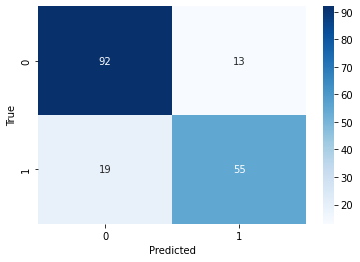

In [33]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### KNN Classifier

In [37]:
classifier= KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform' )
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

# Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.78
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.82      0.82       105
           1       0.74      0.73      0.73        74

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



In [41]:
y_pred= classifier.predict(X_test)
y_pred

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1], dtype=int64)

### Conclusion

In this notebook, we explored the Titanic dataset to predict the survival of passengers using various machine learning algorithms. Here's a summary of the steps and findings:

1. **Data Preparation**: 
   - Imported necessary libraries and the dataset.
   - Performed initial exploration to identify and handle missing values, drop irrelevant columns, and convert categorical variables into numerical form.
   - Visualized data through scatter plots, count plots, and heatmaps to understand feature distributions and correlations.

2. **Feature Selection and Scaling**:
   - Selected features with the highest correlation to the target variable ('Survived').
   - Split the data into training and test sets.
   - Scaled the features for better performance of machine learning models.

3. **Modeling**:
   - Implemented Logistic Regression, Random Forest Classifier, and K-Nearest Neighbors (KNN) to predict survival.
   - Evaluated each model using accuracy, classification reports, and confusion matrices.

4. **Hyperparameter Tuning**:
   - Conducted GridSearchCV to optimize the Random Forest model.
   - Identified the best hyperparameters and evaluated the model's performance with these tuned parameters.

5. **Results**:
   - Logistic Regression achieved a respectable accuracy, indicating its effectiveness for binary classification tasks with this dataset.
   - Random Forest Classifier showed improved performance, benefiting from its ability to handle complex relationships within the data.
   - GridSearchCV further enhanced the Random Forest model's accuracy, demonstrating the value of hyperparameter tuning.
   - K-Nearest Neighbors provided a comparative baseline, showcasing different algorithmic strengths and weaknesses.

In conclusion, this notebook demonstrated a comprehensive approach to data analysis, preprocessing, visualization, and the application of multiple machine learning models to predict Titanic passenger survival. The Random Forest Classifier, especially after hyperparameter tuning, emerged as the most effective model, highlighting the importance of model selection and optimization in predictive analytics.